# Plotting Sigmoid Function From Scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd

### Sigmoid function looks like this :-

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

## Here w and b are our parameters we often call w as slope and b as intercept as well.

In [2]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

### Sigmoid will give us values between 0 to 1 always we can also test it by putting some random values of parameters as well.

In [3]:
sigmoid(2, 0.7, 2)

0.9677045353015494

In [4]:
sigmoid(4, 1.3, 4)

0.9998989708060922

In [5]:
sigmoid(5, 2.5, 20)

0.9999999999999922

In [6]:
sigmoid(1, 0.1, 0)

0.52497918747894

## Visualizing the plot

In [9]:
# this will give us 100 numbers lying between -10 and 10 
X = np.linspace(-10,10,100)

In [10]:
#X

In [11]:
type(X)

numpy.ndarray

In [12]:
w = 0.7
b = 2
X = np.linspace(-10,10,100)

# note that broadcasting takes place here because X is a numpy array hence this sigmoid function below gets calculated
# for every element in X

Y = sigmoid(X, w, b)


In [13]:
type(Y)

numpy.ndarray

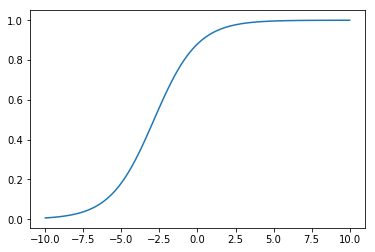

In [14]:
#plotting 

plt.plot(X, Y)
plt.show()

In [15]:
# another example
w = -0.8
b = -0.5
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

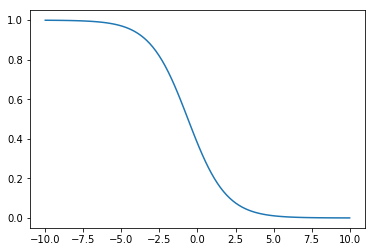

In [16]:
plt.plot(X, Y)
plt.show()

## Note that as the value of W increases the fall of the curve becomes very quick.

## Now in the previous case we had only one feature which had 100 values what if we have more than one features.

### Let us do it for two features.

$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [17]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [18]:
sigmoid_2d(3, 0, 0.5, 2, 1)

0.9241418199787566

In [19]:
sigmoid_2d(1, 3, 0.5, 1, 0.3)

0.9781187290638694

In [20]:
sigmoid_2d(1.3, 0.8, 5, 0.7, 0)

0.999141958773035

In [21]:
sigmoid_2d(1, 10, 2.3, 0, 2)

0.9866130821723351

## Now we will need to plot a 3D plot because we need 3 axis ---> x1,x2,sigmoid()

In [22]:
# refer --> https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

In [23]:
X1 = np.linspace(-10, 10, 200) # giving  random values to feature 1 x1
X2 = np.linspace(-10, 10, 200) # giving  random values to feature 2 x2

XX1, XX2 = np.meshgrid(X1, X2) # it creates the joint grid with every possible pair

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(200,) (200,) (200, 200) (200, 200)


In [24]:
w1 = 2.5  # giving weights to our features
w2 = -0.7 # # giving weights to our features
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

## Contour plots

In [25]:
# https://stackoverflow.com/questions/16834861/create-own-colormap-using-matplotlib-and-plot-color-scale

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

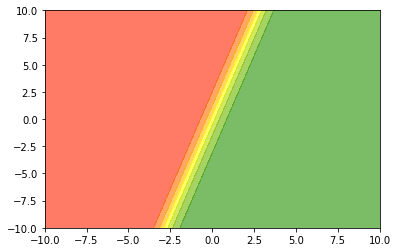

In [26]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

### Notice that the transition which took place here is very fast as you can see that it was red and very fastly within a short width it became green that is happening because of large value of w2 = 2.5 as it represents the slope and high slope means quick transition.

In [55]:
w1 = 0.5  # giving weights to our features
w2 = 0.7 # # giving weights to our features
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

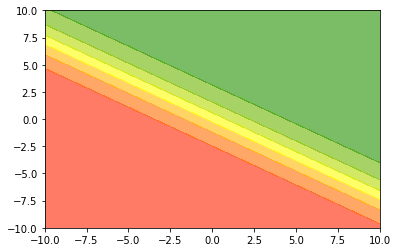

In [56]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

### You can clearly see that the transition which took place here was slow because we have used a smaler value of w2 = 0.5 hence the slope is less.

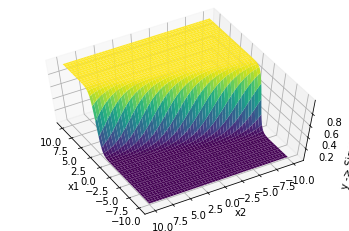

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y -> Sigmoid output')

ax.view_init(60, 150)


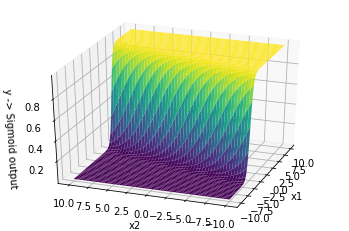

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y -> Sigmoid output')

ax.view_init(30, 200)

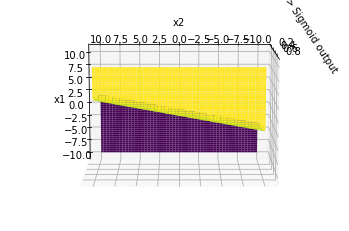

In [35]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y -> Sigmoid output')

ax.view_init(100, 180)

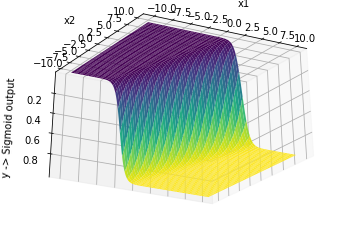

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y,cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y -> Sigmoid output')

ax.view_init(150, 300)

## Note that above plot is for the following condition --> We are given with the inputs and we are visualizing the output.

# Compute Loss for a Given Dataset

In [36]:
w_unknown = 0.5  # we took random values for w and b by ourselves initially.
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

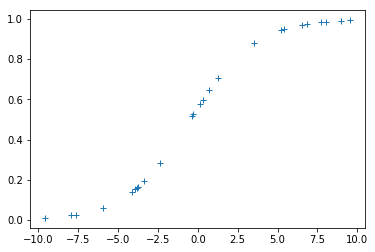

In [38]:
plt.plot(X, Y, '+')
plt.show()

In [39]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [40]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [41]:
WW.shape

(101, 101)

In [42]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

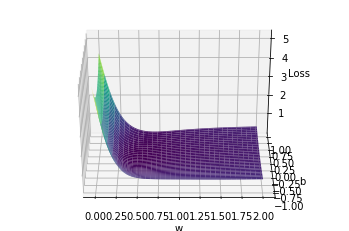

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [46]:
Loss.shape[1]

101

In [47]:
Loss.shape[0]

101

In [49]:
ij = np.argmin(Loss)
ij

6287

In [50]:
i = int(np.floor(ij/Loss.shape[1]))
i

62

In [51]:
j = int(ij - i * Loss.shape[1])
j

25

In [52]:
print(i, j)

62 25


In [53]:
print(WW[i, j], BB[i, j])

0.5 0.24


# Class for Sigmoid Neuron

In [58]:
class SigmoidNeuron:
  
  def __init__(self):  # initialization
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b  # it will calculate the whole of W_i*X_i + b which we will need to pass to the sigmoid function.
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))  # here we are passing the whole of W_i*X_i to the sigmoid function.
    return (y_pred - y) * y_pred * (1 - y_pred) * x   # this is the gradient formula for w which we derived in theory.
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))   
    return (y_pred - y) * y_pred * (1 - y_pred)  # this is the gradient formula for b which we derived in theory.
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b ---> we are initilizing them with random values.
    
    if initialise:  # we may choose not to initialise in some particular cases that's why this code is written.
      self.w = np.random.randn(1, X.shape[1])  # w has 1 row and   X.shape[1] number of columns.
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

# Fit for toy data

In [83]:
# these points are already linearly seperable.
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]  # binary output for ground truth.

In [84]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [85]:
print(sn.w, sn.b)   # after one epoch

[[0.6647546  0.36304876]] [0.01401486]


In [87]:
N = 30  # epochs
for i in range(N):
  print(sn.w, sn.b)
  sn.fit(X, Y, 1, 0.25, False)  # fitting for one epoch here and above we have loop for 30 times hence in total doing for 30 epochs.

[[ 1.82064639 -0.5968076 ]] [-0.71487732]
[[ 1.82799629 -0.59918048]] [-0.72002434]
[[ 1.83523457 -0.60151753]] [-0.72508418]
[[ 1.84236446 -0.60381977]] [-0.73005949]
[[ 1.84938909 -0.60608819]] [-0.73495284]
[[ 1.85631142 -0.60832375]] [-0.73976667]
[[ 1.86313431 -0.61052735]] [-0.74450332]
[[ 1.86986049 -0.61269988]] [-0.74916503]
[[ 1.87649259 -0.61484216]] [-0.75375396]
[[ 1.88303313 -0.61695502]] [-0.75827217]
[[ 1.88948455 -0.61903922]] [-0.76272165]
[[ 1.89584916 -0.62109553]] [-0.7671043]
[[ 1.90212922 -0.62312465]] [-0.77142194]
[[ 1.90832687 -0.62512729]] [-0.77567634]
[[ 1.91444421 -0.62710411]] [-0.77986919]
[[ 1.92048322 -0.62905575]] [-0.78400211]
[[ 1.92644585 -0.63098284]] [-0.78807667]
[[ 1.93233393 -0.63288597]] [-0.79209437]
[[ 1.93814928 -0.63476571]] [-0.79605668]
[[ 1.94389362 -0.63662263]] [-0.79996498]
[[ 1.94956863 -0.63845726]] [-0.80382062]
[[ 1.9551759  -0.64027012]] [-0.80762492]
[[ 1.96071701 -0.6420617 ]] [-0.81137911]
[[ 1.96619345 -0.6438325 ]] [-0.815

## Above we can see that the value of w is slowly decreasing with every epoch.

## We will see visually how these change in weights will change the decision boundary.

In [88]:
# defining a plotting function.
# this code taken from --- > https://padhai.onefourthlabs.in

def plot_sn(X, Y, sn, ax):  # ax is the plot handler
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

## Let us visualise the initialisation which we took at first

[[ 0.5332738  -1.34045052]] [0.01644832]


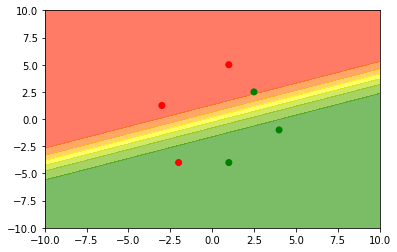

In [93]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)
print(sn.w, sn.b)
ax = plt.subplot()
plot_sn(X, Y, sn,ax)

## So the above plot shows us the decision boundary based on the random initilisation which we took now we need to fix this decision boundary only using the learning algorithm.

[[-0.2365003   1.14365073]] [0.00065291]
[[0.23305839 0.97567705]] [0.01152084]
[[0.96189238 0.65342913]] [0.01152231]
[[1.0677058 0.2489747]] [0.07932207]
[[ 1.11364917 -0.35473815]] [0.11002088]
[[ 1.1883017  -0.44174878]] [0.00304886]
[[ 1.30171455 -0.3724431 ]] [-0.08305151]
[[ 1.32418836 -0.53546736]] [-0.16346748]
[[ 1.45101284 -0.37942656]] [-0.22658129]
[[ 1.44250197 -0.59313339]] [-0.29370417]
[[ 1.56026823 -0.43008064]] [-0.3427798]
[[ 1.55780652 -0.58492112]] [-0.39393589]
[[ 1.63094559 -0.5057873 ]] [-0.43039442]
[[ 1.65000382 -0.56434055]] [-0.46630438]
[[ 1.68985134 -0.55425032]] [-0.49618784]
[[ 1.7177606  -0.57066957]] [-0.52451094]
[[ 1.74680179 -0.57791514]] [-0.55035239]
[[ 1.77341523 -0.58676519]] [-0.57442725]
[[ 1.79868252 -0.59475186]] [-0.59685755]
[[ 1.82260117 -0.60236661]] [-0.6178497]
[[ 1.8453223  -0.60959777]] [-0.63755989]
[[ 1.86695803 -0.6164852 ]] [-0.65612313]
[[ 1.88760659 -0.62305999]] [-0.67365496]
[[ 1.90735352 -0.62934927]] [-0.69025503]
[[ 1.926

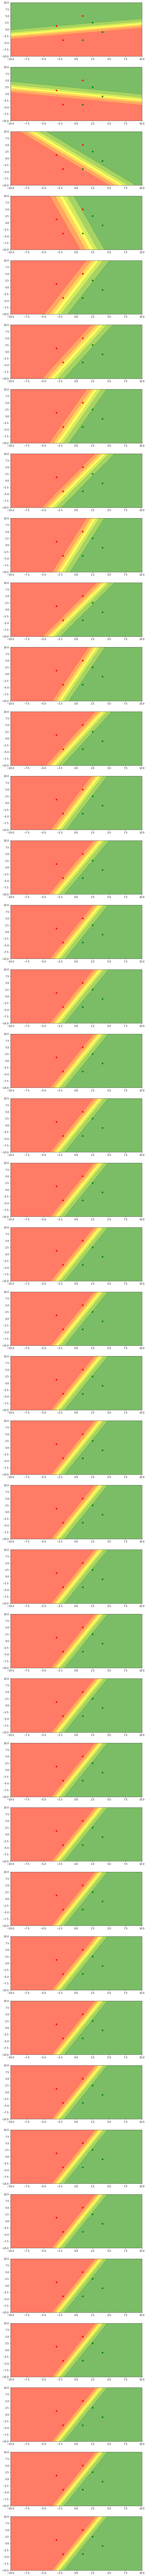

In [94]:
sn.fit(X, Y, 1, 0.05, True)
N = 40
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.75, False)

## We can see how beautifully the decision boundary is changing with every epoch value and we are able to separate the data points of both category.

##  Note -> Large learning rates are not good because they bring drastic change after every iteration and very small learning rates are also not good because they don't allow the problem to get converged within the given epoch value.